# Damped double pendulum

In [1]:
from train_test_utils import LossDistribution

In [26]:
import os
import re
import matplotlib.pyplot as plt
from typing import Dict, List

In [3]:
def all_plots_for_datafile(filepath: str) -> None:
    l = LossDistribution(filepath)
    l.plot_learning_curves()
    for epoch in [0, 5, 10, 20, 30]:
        l.plot_distribution_at_epoch(epoch)
    # l.plot_wasserstein_vs_epoch()
    l.plot_relmeandiff_vs_epoch()
    l.plot_lqrtest_pvalue_vs_epoch()

In [73]:
def compile_loss_distributions() -> List[LossDistribution]:
    def get_friction_coef(path: str) -> float:
        x = re.search("friction=(0.[0-9]+)", path)
        if x is None:
            raise ValueError(f"path {path} doesn't have friction in it")
            
        return float(x.groups()[0])
        
    root, _, files = next(os.walk("20230507_distributions/"))
    files = [os.path.join(root, f) for f in files if "doublependulum_friction" in f]
    loss_distributions = [LossDistribution(path) for path in files]
    for l in loss_distributions:
        l.friction = get_friction_coef(l.filepath)
        
    loss_distributions = sorted(loss_distributions, key=lambda l: l.friction)
    return loss_distributions

loss_distributions = compile_loss_distributions()
loss_distributions[0].friction

0.003

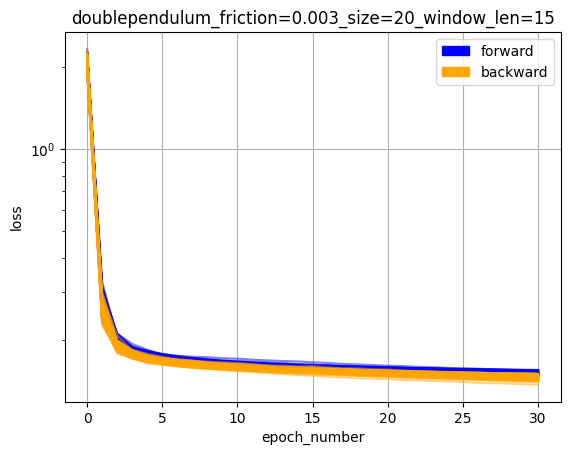

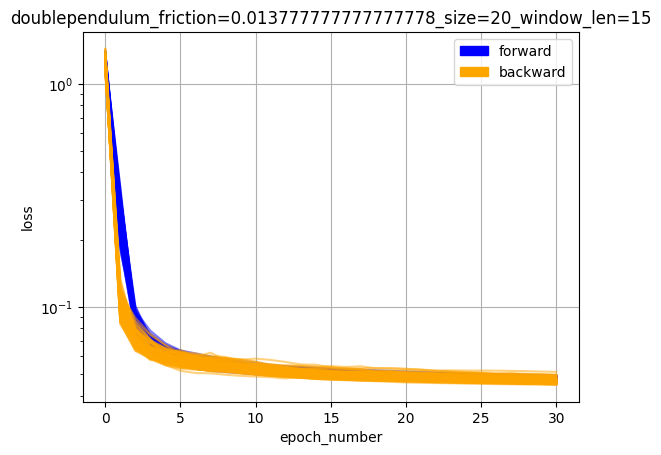

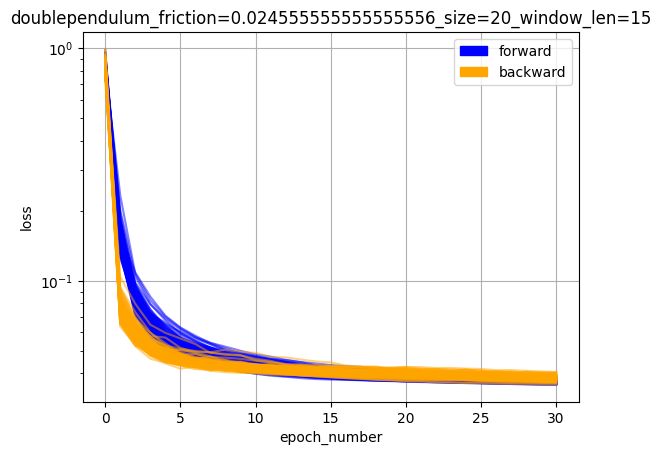

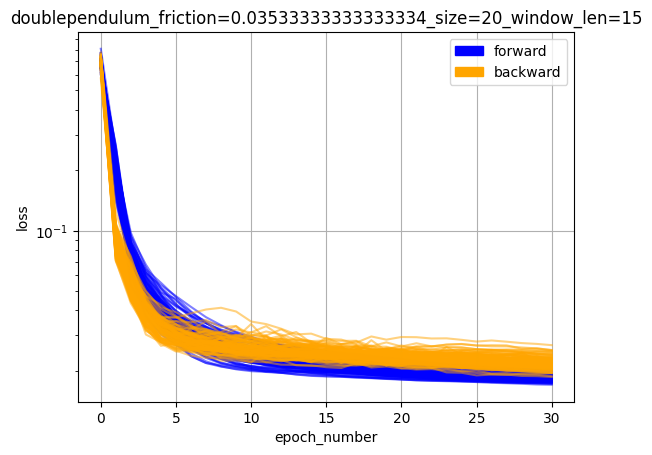

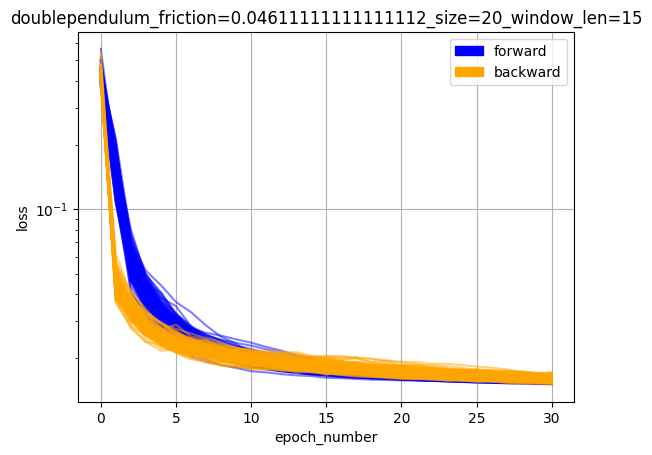

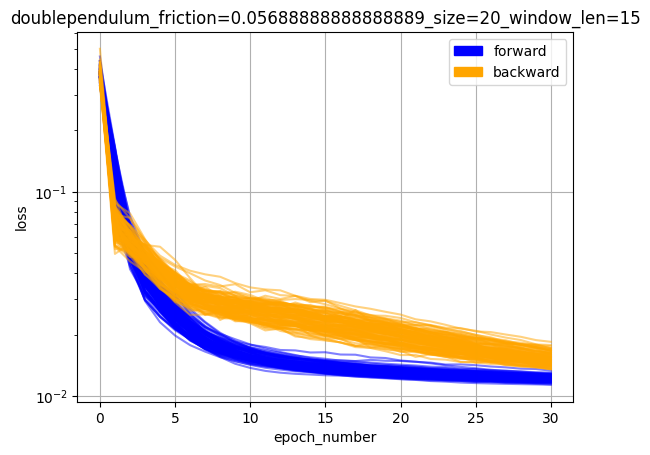

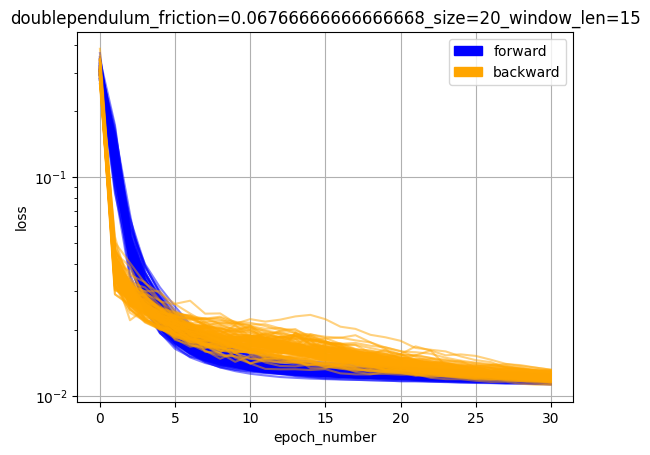

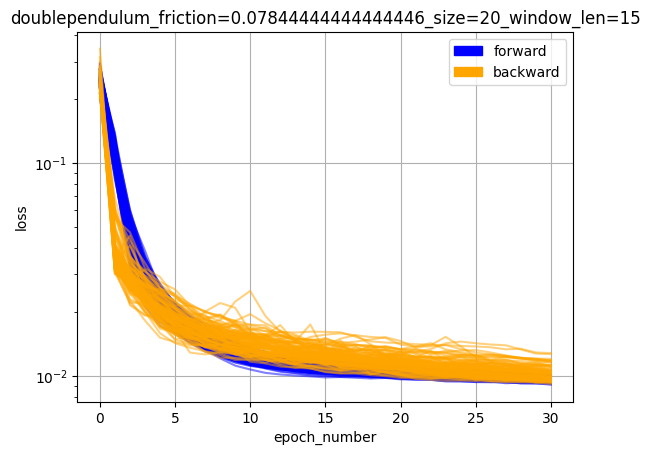

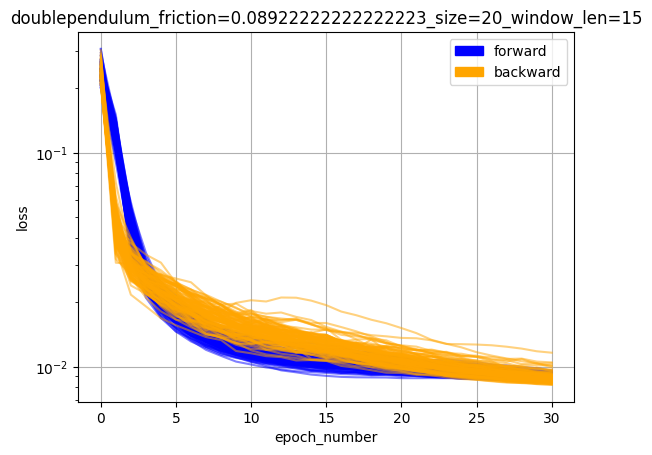

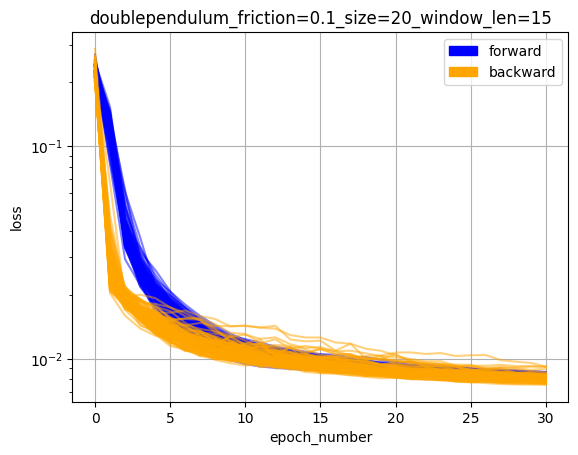

In [74]:
for l in loss_distributions:
    l.plot_learning_curves()

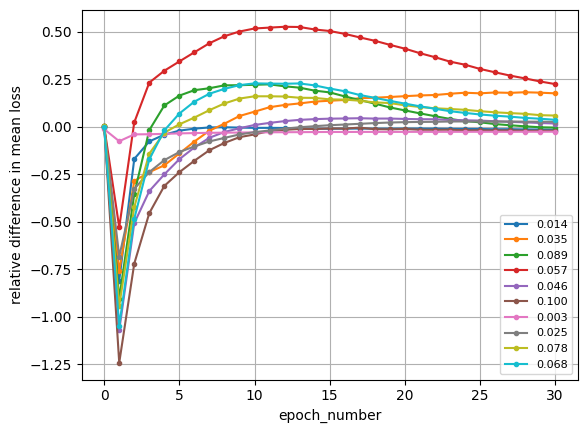

In [37]:
def plot_relmeandiffs(loss_distributions: List[LossDistribution]) -> None:
    for l in loss_distributions:
        plt.plot(l.relmeandiff_all(), "o-", markersize=3, label=f"{l.friction:.3f}") 
    plt.grid()
    plt.xlabel("epoch_number")
    plt.ylabel("relative difference in mean loss")
    plt.legend(prop={"size":8})
    plt.show()
    
plot_relmeandiffs(loss_distributions)

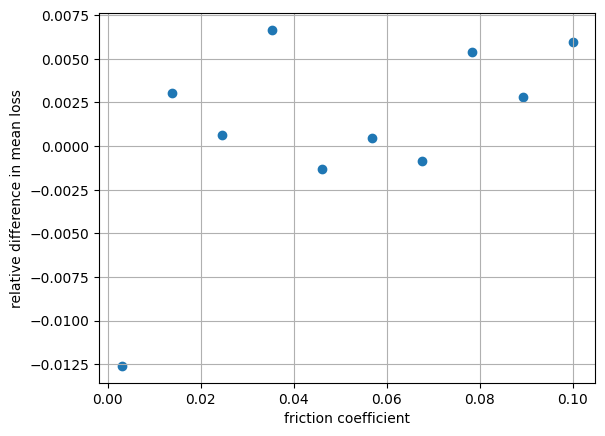

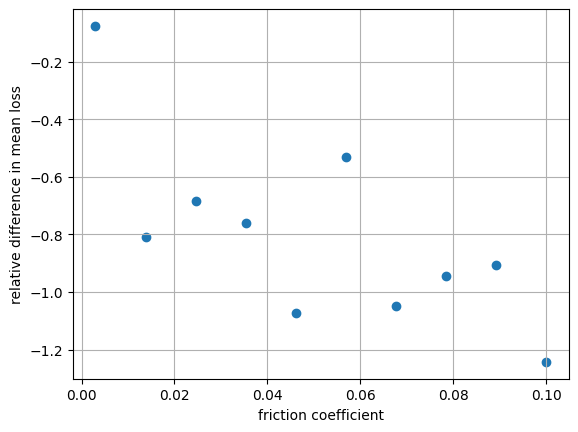

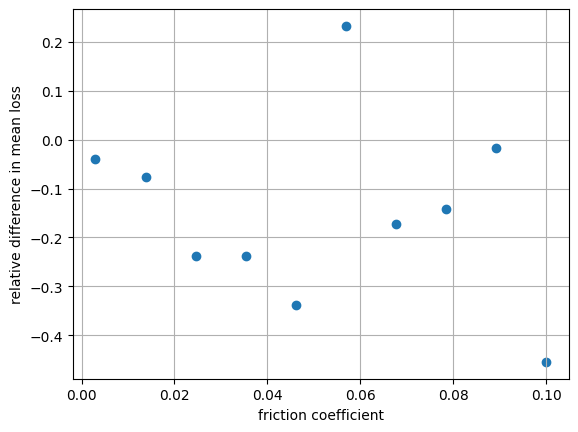

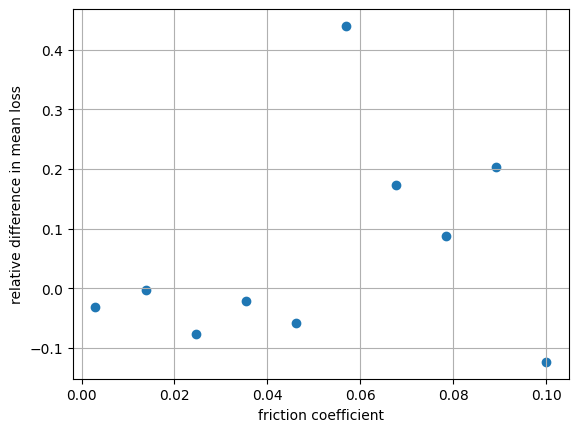

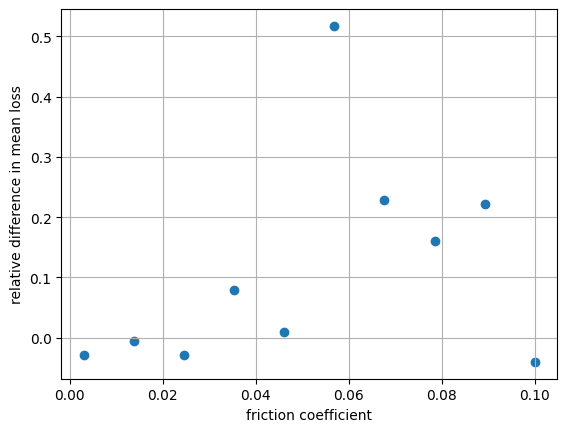

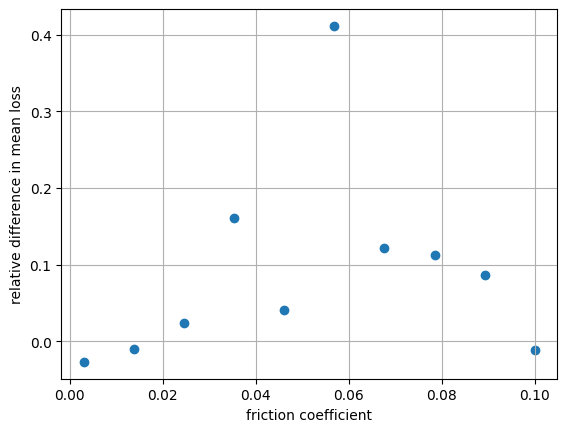

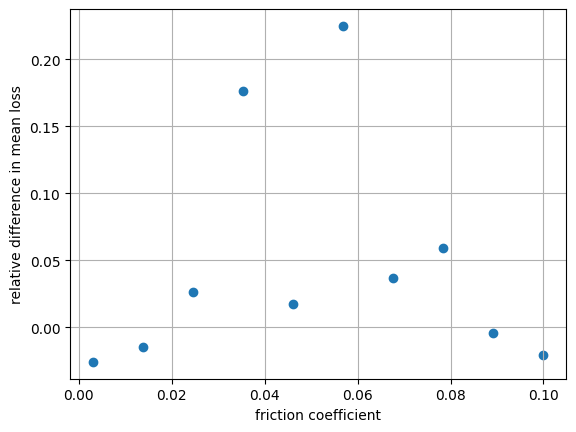

In [63]:
def plot_relmeandiff_vs_friction(loss_distributions, epoch: int = 5) -> None:
    frictions = [l.friction for l in loss_distributions]
    relmeandiffs = [l.relmeandiff_at_epoch(epoch) for l in loss_distributions]
    plt.scatter(frictions, relmeandiffs)
    plt.grid()
    plt.xlabel("friction coefficient")
    plt.ylabel("relative difference in mean loss")
    plt.show()

for epoch in (0, 1, 3, 7, 10, 20, 30):
    plot_relmeandiff_vs_friction(loss_distributions, epoch=epoch)

epoch=0


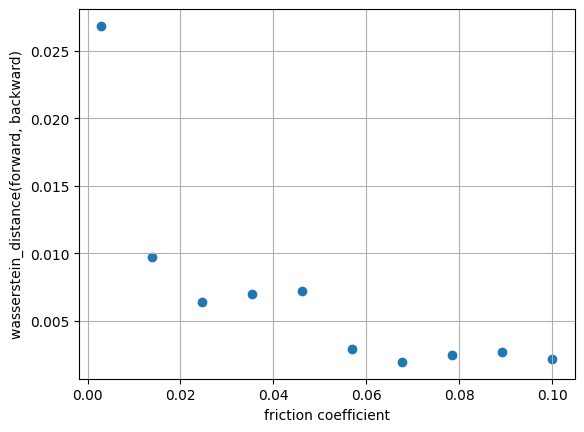

epoch=1


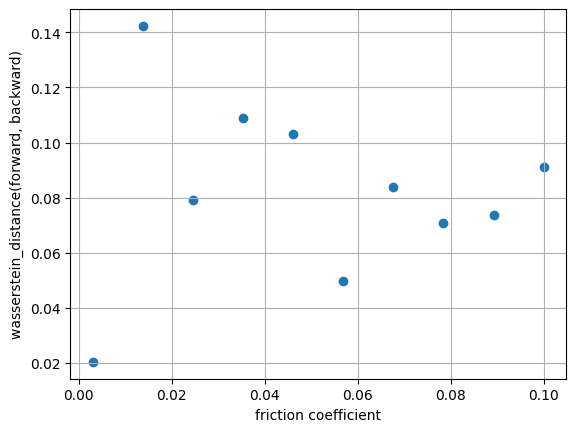

epoch=3


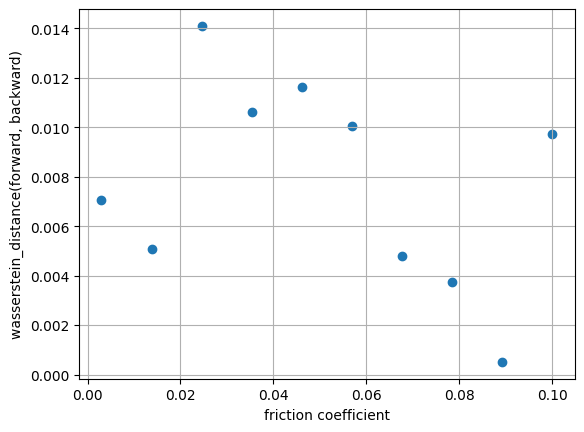

epoch=7


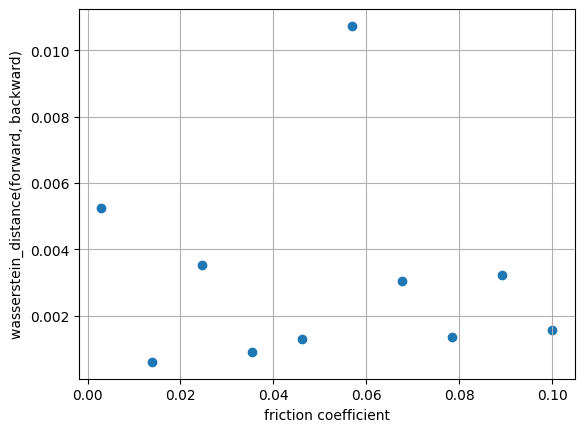

epoch=10


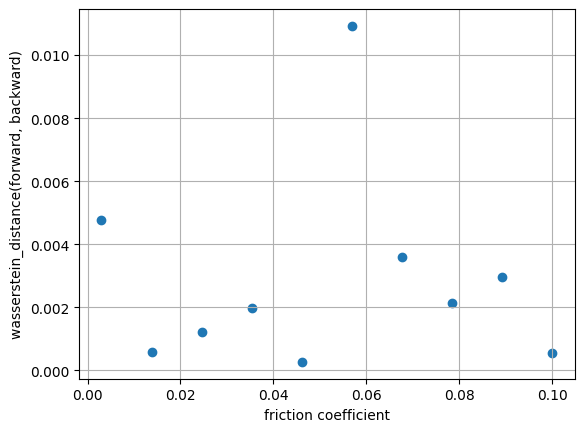

epoch=20


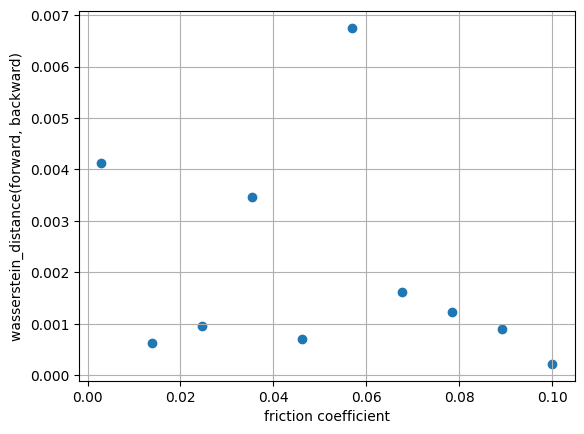

epoch=30


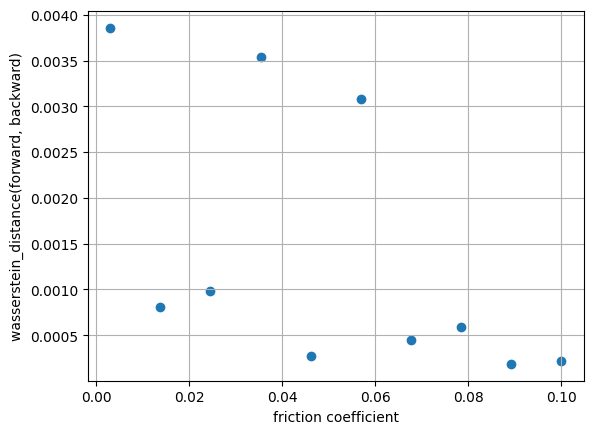

In [72]:
def plot_wasserstein_vs_friction(loss_distributions, epoch: int = 5) -> None:
    frictions = [l.friction for l in loss_distributions]
    wassersteins = [l.wasserstein(epoch) for l in loss_distributions]
    plt.scatter(frictions, wassersteins)
    plt.grid()
    plt.xlabel("friction coefficient")
    plt.ylabel("wasserstein_distance(forward, backward)")
    plt.show()

for epoch in (0, 1, 3, 7, 10, 20, 30):
    print(f"epoch={epoch}")
    plot_wasserstein_vs_friction(loss_distributions, epoch=epoch)

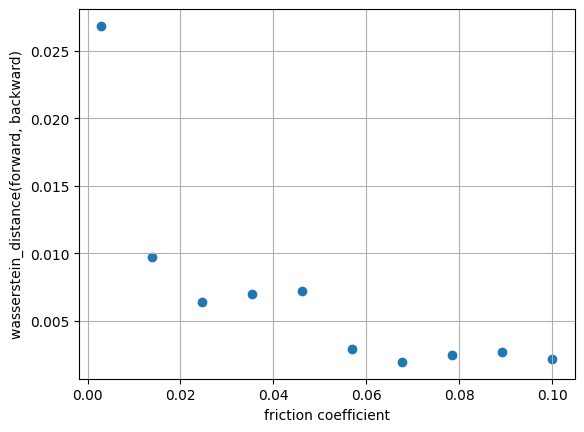

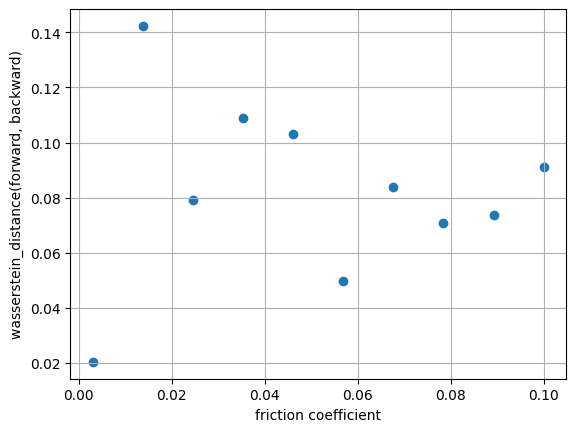

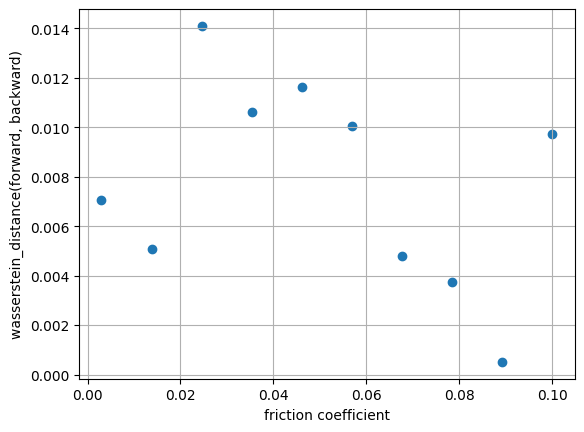

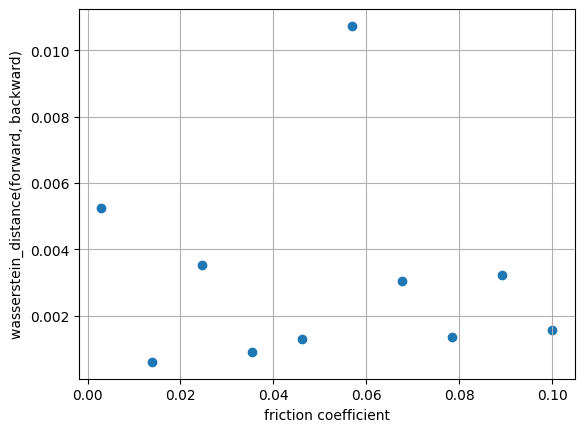

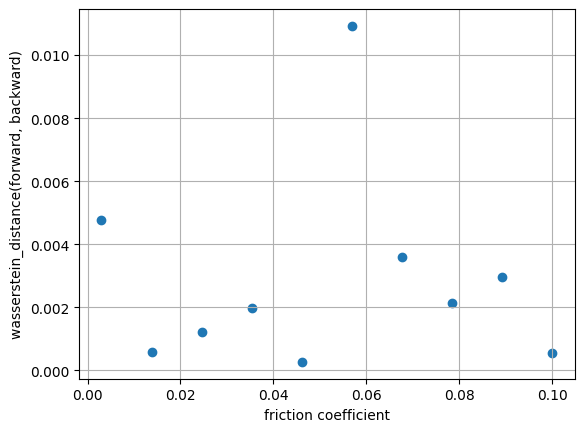

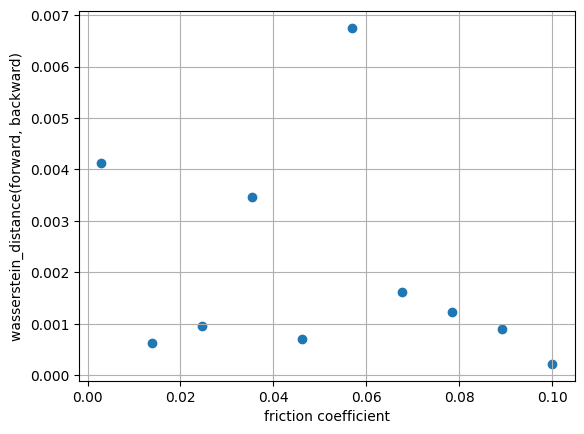

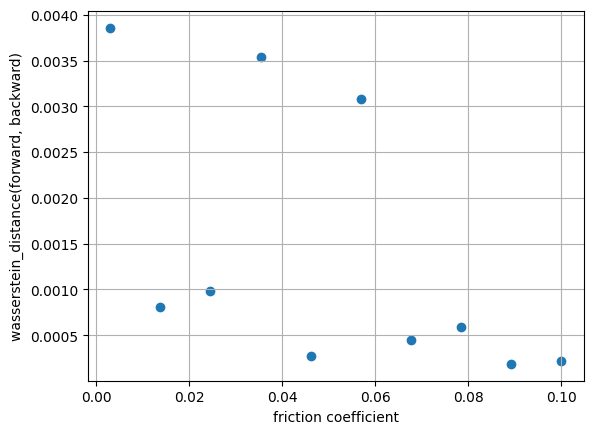

In [69]:
def plot_lqrt_vs_friction(loss_distributions, epoch: int = 5) -> None:
    frictions = [l.friction for l in loss_distributions]
    lqrts = [l.lqrtest(epoch).pvalue for l in loss_distributions]
    plt.scatter(frictions, lrts)
    plt.grid()
    plt.xlabel("friction coefficient")
    plt.ylabel("lqrt(forward, backward).pvalue")
    plt.show()

for epoch in (0, 1, 3, 7, 10, 20, 30):
    plot_wasserstein_vs_friction(loss_distributions, epoch=epoch)

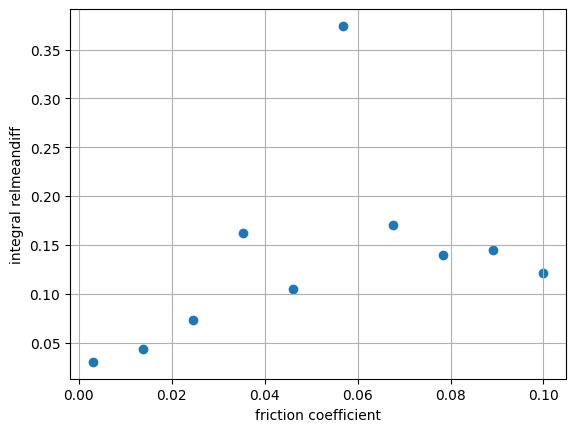

In [71]:
def plot_integral_relmindiff_vs_friction(loss_distributions) -> None:
    frictions = [l.friction for l in loss_distributions]
    def integral_relmindiff(l: LossDistribution) -> float:
        return np.mean(np.abs(l.relmeandiff_all()))
    
    integral_relmindiffs = [integral_relmindiff(l) for l in loss_distributions]
    plt.scatter(frictions, integral_relmindiffs)
    plt.grid()
    plt.xlabel("friction coefficient")
    plt.ylabel("integral relmeandiff")
    plt.show()
    
plot_integral_relmindiff_vs_friction(loss_distributions)